In [2]:
# Useful starting lines
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [8]:
from proj1_helpers import *
from implementations_s import*
from cross_validation import *

In [46]:
DATA_TRAIN_PATH = '../../data/train.csv'
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

### Cleaning of the dataset

In [48]:
#Feature names and their respective indices
string_features = 'DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt'
features = string_features.split(",")
dict_ = {}
for ind, feat in enumerate(features):
    dict_[feat] = ind

In [21]:
# selecting only well-defined samples
selector = np.all(x != -999.0, axis=1)
x_non_nan = x[selector]
y_non_nan = y[selector]
x_non_nan, _ , _ = standardize(x_clean)
print("We removed", (1 - x_non_nan.shape[0] / x.shape[0]) * 100, "% of our training dataset.")

We removed 72.7544 % of our training dataset.


In [106]:
# replacing the non-defined features by the mean of the features 
x_mean_replacement = helpers.replace_mean(x)

In [13]:
# replacing the non-defined features by the mean of the features, according by the reactor
x_subgroups_list, ids_list = subgrouping(x, ids, dict_)
x_subgroups = group(x_subgroups_list, ids_list, dict_)

In [56]:
# only taking well-defined features
# careful can output some nan values depending on the kept features
x_selected_features = select_non_nan_columns(x)

In [58]:
# combining subroups and not seclecting all features
x_selected_features_subgoups = select_non_nan_columns(x_subgroups)

In [60]:
# selecting model to use
y_clean = y
x_clean = x_selected_features_subgoups

### Least squares

In [27]:
least_squares_demo(y_clean, x_clean, 4)

   mse=0.7030151090640121
   accuracy=0.734


### Least Squares GD

In [49]:
LS_GD_demo(y_clean, x_clean, 4)

   gamma=0.215, mse=0.737
   accuracy=0.726


### Least Square SGD

In [66]:
LS_SGD_demo(y_clean, x_clean, 4)

   gamma=0.316, batch=1.00, mse=0.738
   accuracy=0.725


### Ridge Regression

   lambda=0.013, mse=0.640
   accuracy=0.769


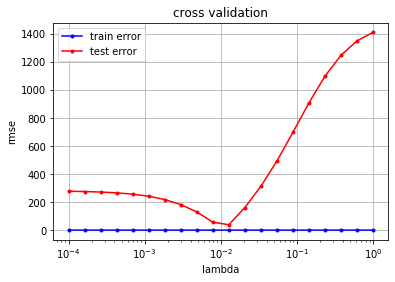

In [61]:
ridge_regression_demo(y_clean, x_clean, degree=4, k_fold=4)

### Logistic regression

In [93]:
lr_demo(y_clean, x_clean, 4)

   gamma=0.001,loss=-26008.978
   accuracy=0.685


### Regularized logistic regression

In [7]:
lrr_demo(y_clean, x_clean, 4)

   gamma=0.464, mse=-21227.145 lambda1.000
   accuracy=0.630


### Outputing the predictions

In [45]:
DATA_TEST_PATH = '../../data/test.csv' 
OUTPUT_PATH = './submissions'
_, x_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [63]:
# cleaning the test input
x_test_subgroups_list, ids_list = subgrouping(x_test, ids_test, dict_)
x_test_subgroups = group(x_test_subgroups_list, ids_list, dict_)
x_test_sel_features_subgoups = select_non_nan_columns(x_test_subgroups)

tx_test = helpers.build_poly(x_test_sel_features_subgoups, 4)

# comptute the model parameters
w, loss = imp.ridge_regression(y_clean, helpers.build_poly(x_clean, 4), lambda_=0.013)

# predict and write predictions
y_pred = predict_labels(w, tx_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)